In [27]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [28]:
coinsEagle = coins[coins['Denom'] == 'Eagle']
coinsEagle = coinsEagle[['Year', 'Mint_State', 'Value']]

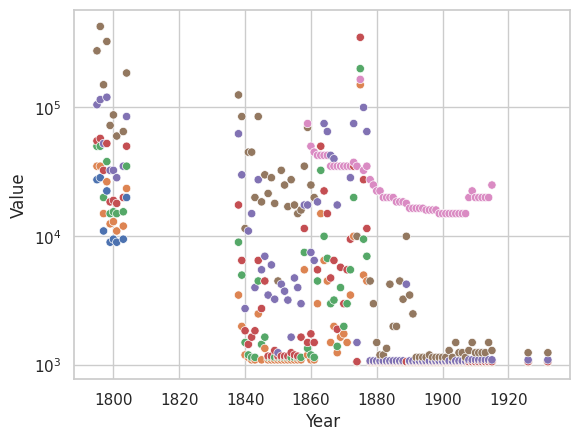

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsEagle, hue='Mint_State', legend=False)
plt.yscale('log')

In [30]:
import pandas as pd

df = pd.DataFrame(coinsEagle)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
      Year     Mint_State     Value
9186  1795          EFine   50000.0
9187  1795  AUncirculated   55000.0
9188  1795    MintState60  105000.0
9189  1795    MintState63  275000.0
9192  1796          EFine   50000.0
9193  1796  AUncirculated   57500.0
9194  1796    MintState60  115000.0
9195  1796    MintState63  425000.0
9200  1797    MintState60   52500.0
9201  1797    MintState63  150000.0
9205  1798  AUncirculated   52500.0
9206  1798    MintState60  120000.0
9207  1798    MintState63  325000.0
9213  1799    MintState63   72500.0
9219  1800    MintState63   87500.0
9225  1801    MintState63   60000.0
9231  1803    MintState63   65000.0
9235  1804  AUncirculated   50000.0
9236  1804    MintState60   85000.0
9237  1804    MintState63  185000.0
9241  1838    MintState60   62500.0
9242  1838    MintState63  125000.0
9247  1839    MintState63   85000.0
9257  1841    MintState63   45000.0
9262  1842    MintState63   45000.0
9272  1844    MintState63   850

In [31]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([9186, 9187, 9188, 9189, 9192, 9193, 9194, 9195, 9200, 9201, 9205,
       9206, 9207, 9213, 9219, 9225, 9231, 9235, 9236, 9237, 9241, 9242,
       9247, 9257, 9262, 9272, 9347, 9348, 9354, 9360, 9365, 9368, 9369,
       9373, 9374, 9378, 9379, 9383, 9417, 9425, 9426, 9427, 9428, 9432,
       9437])

In [32]:
for i in indicies:
  coinsEagle = coinsEagle.drop(i)

In [33]:
coinsEagle

,Year,Mint_State,Value
9184,1795,Fine,27500.0
9185,1795,VFine,35000.0
9190,1796,Fine,28500.0
9191,1796,VFine,35000.0
9196,1797,Fine,11000.0
...,...,...,...
9672,1932,VFine,1050.0
9673,1932,EFine,1060.0
9674,1932,AUncirculated,1065.0
9675,1932,MintState60,1100.0


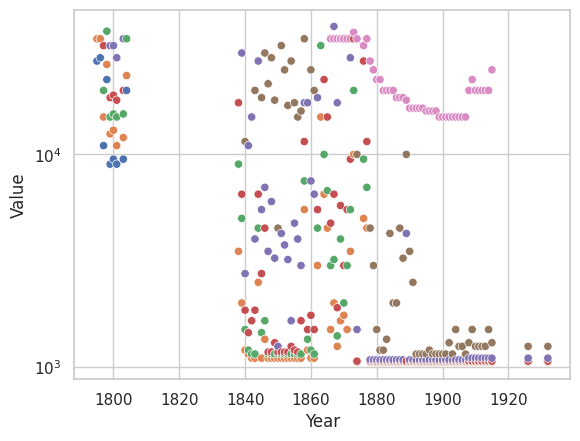

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsEagle, hue='Mint_State', legend=False)
plt.yscale('log')

In [35]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsEagle["Mint_State"] = lencMS.fit_transform(coinsEagle["Mint_State"])
coinsEagle["Mint_State"]

9184    2
9185    6
9190    2
9191    6
9196    2
       ..
9672    6
9673    1
9674    0
9675    3
9676    4
Name: Mint_State, Length: 448, dtype: int64

In [36]:
coinsEagle['log_Value'] = np.log(coinsEagle['Value'])

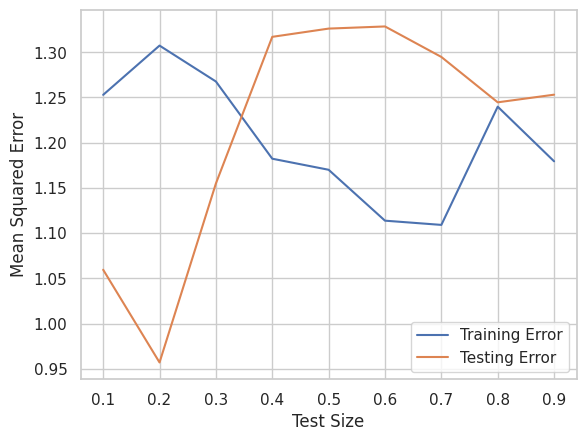

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsEagle.iloc[:,0:2]
y = coinsEagle.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = coinsEagle.iloc[:,0:2]
Y = coinsEagle.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.4, random_state=0)

In [39]:
X

,Year,Mint_State
9184,1795,2
9185,1795,6
9190,1796,2
9191,1796,6
9196,1797,2
...,...,...
9672,1932,6
9673,1932,1
9674,1932,0
9675,1932,3


In [40]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [41]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [42]:
mseModel1

34274967.574592575

In [43]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.02014755  0.127197  ]
Intercept: 45.434411495936544


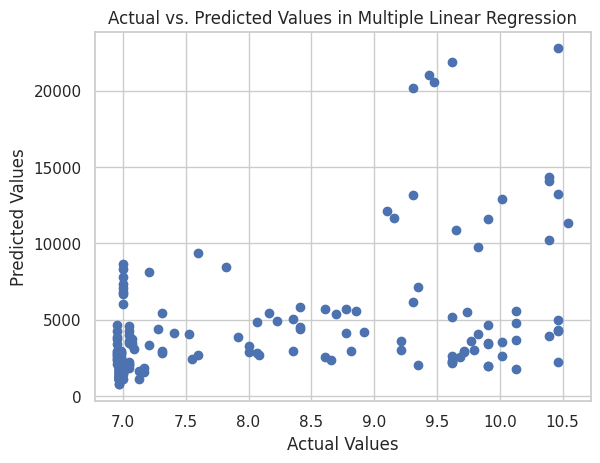

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

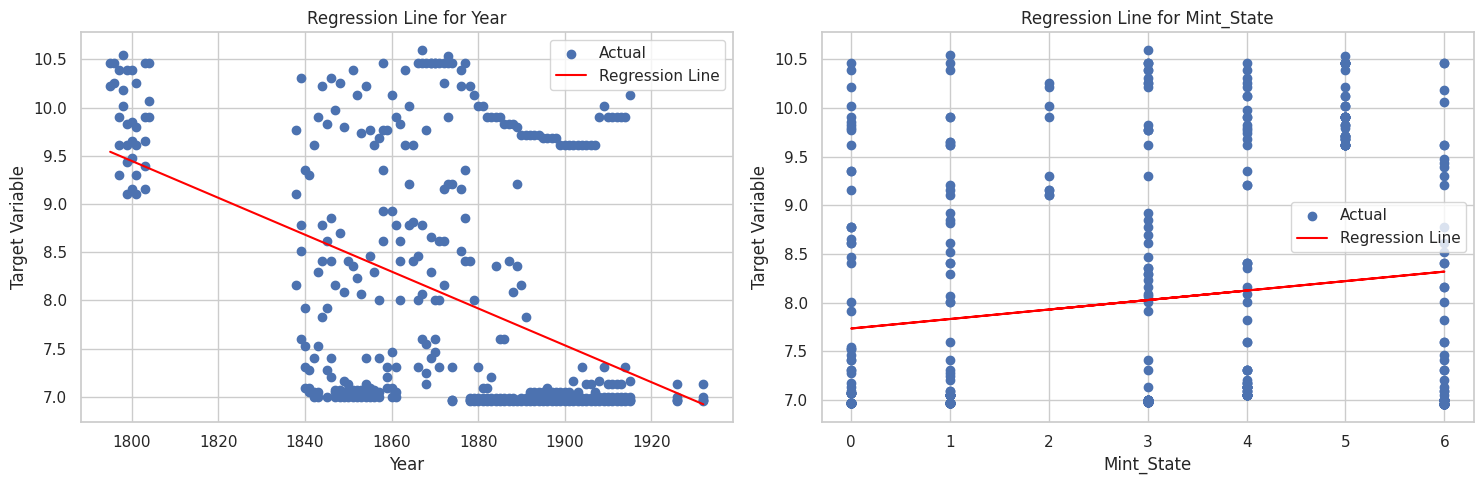

In [45]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [46]:
coinsEagle[coinsEagle['Mint_State'] == 7]

,Year,Mint_State,Value,log_Value


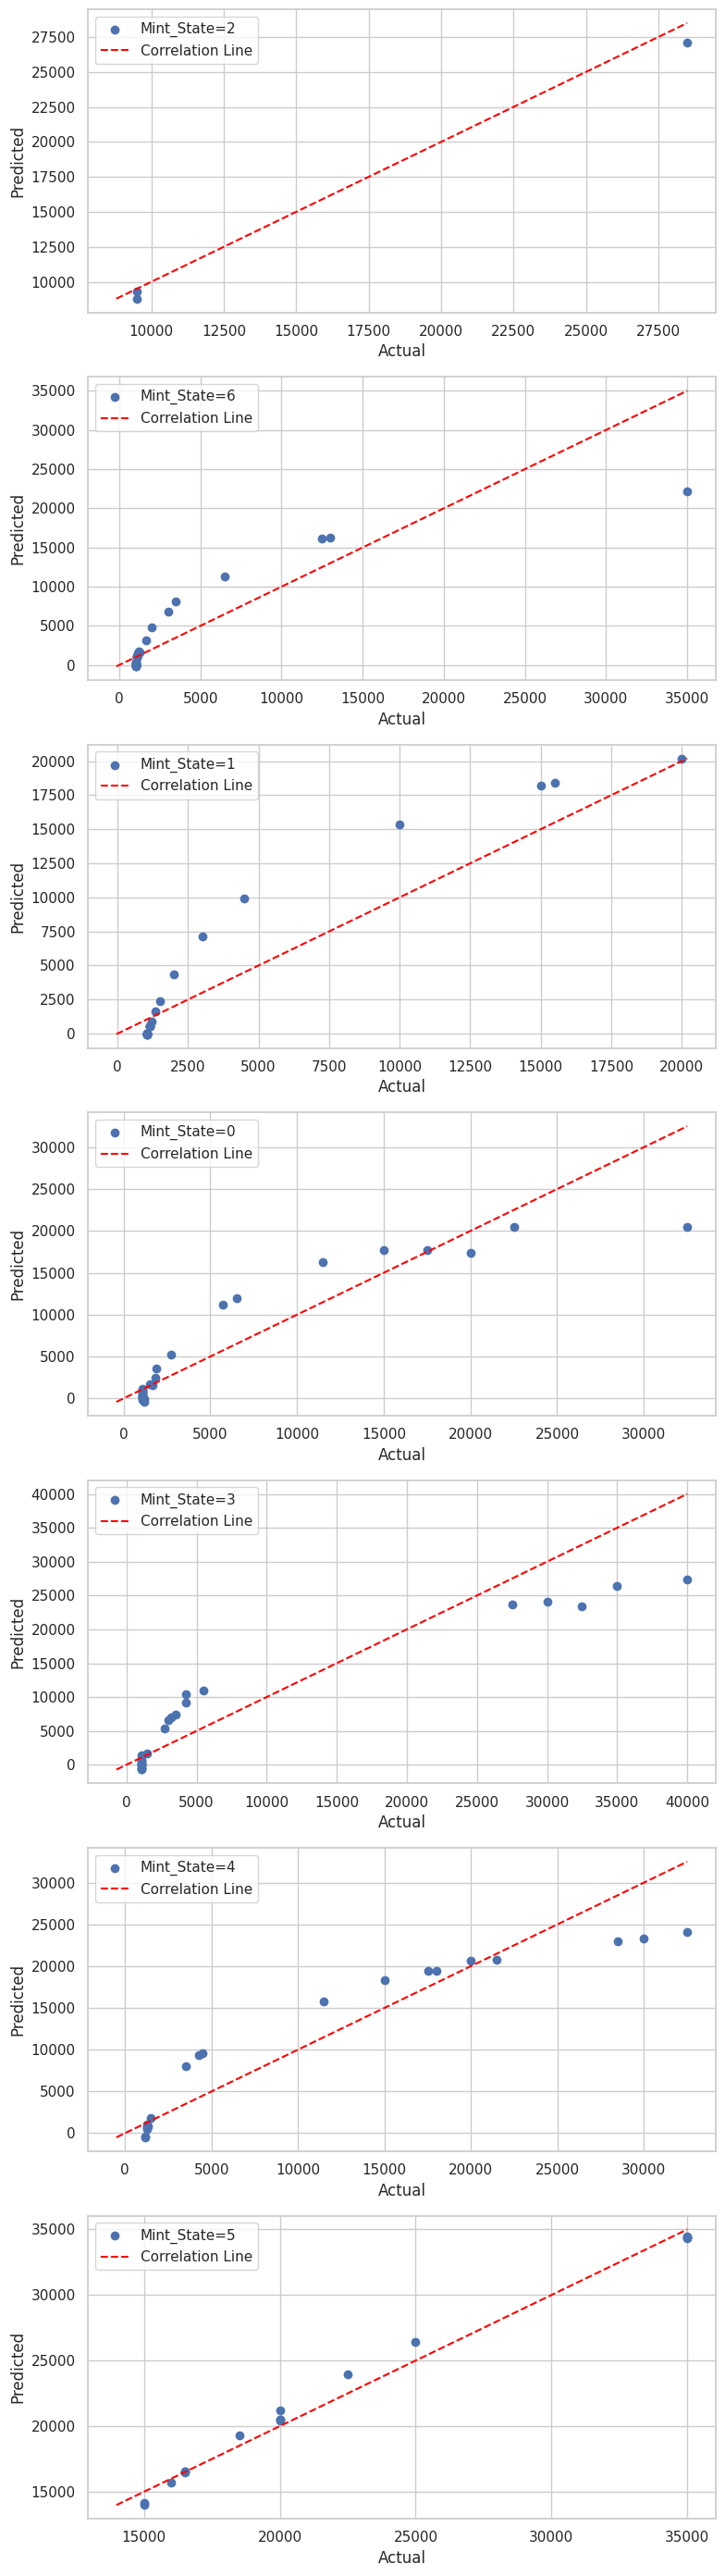

In [47]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsEagle.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsEagle['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsEagle[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsEagle[coinsEagle[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

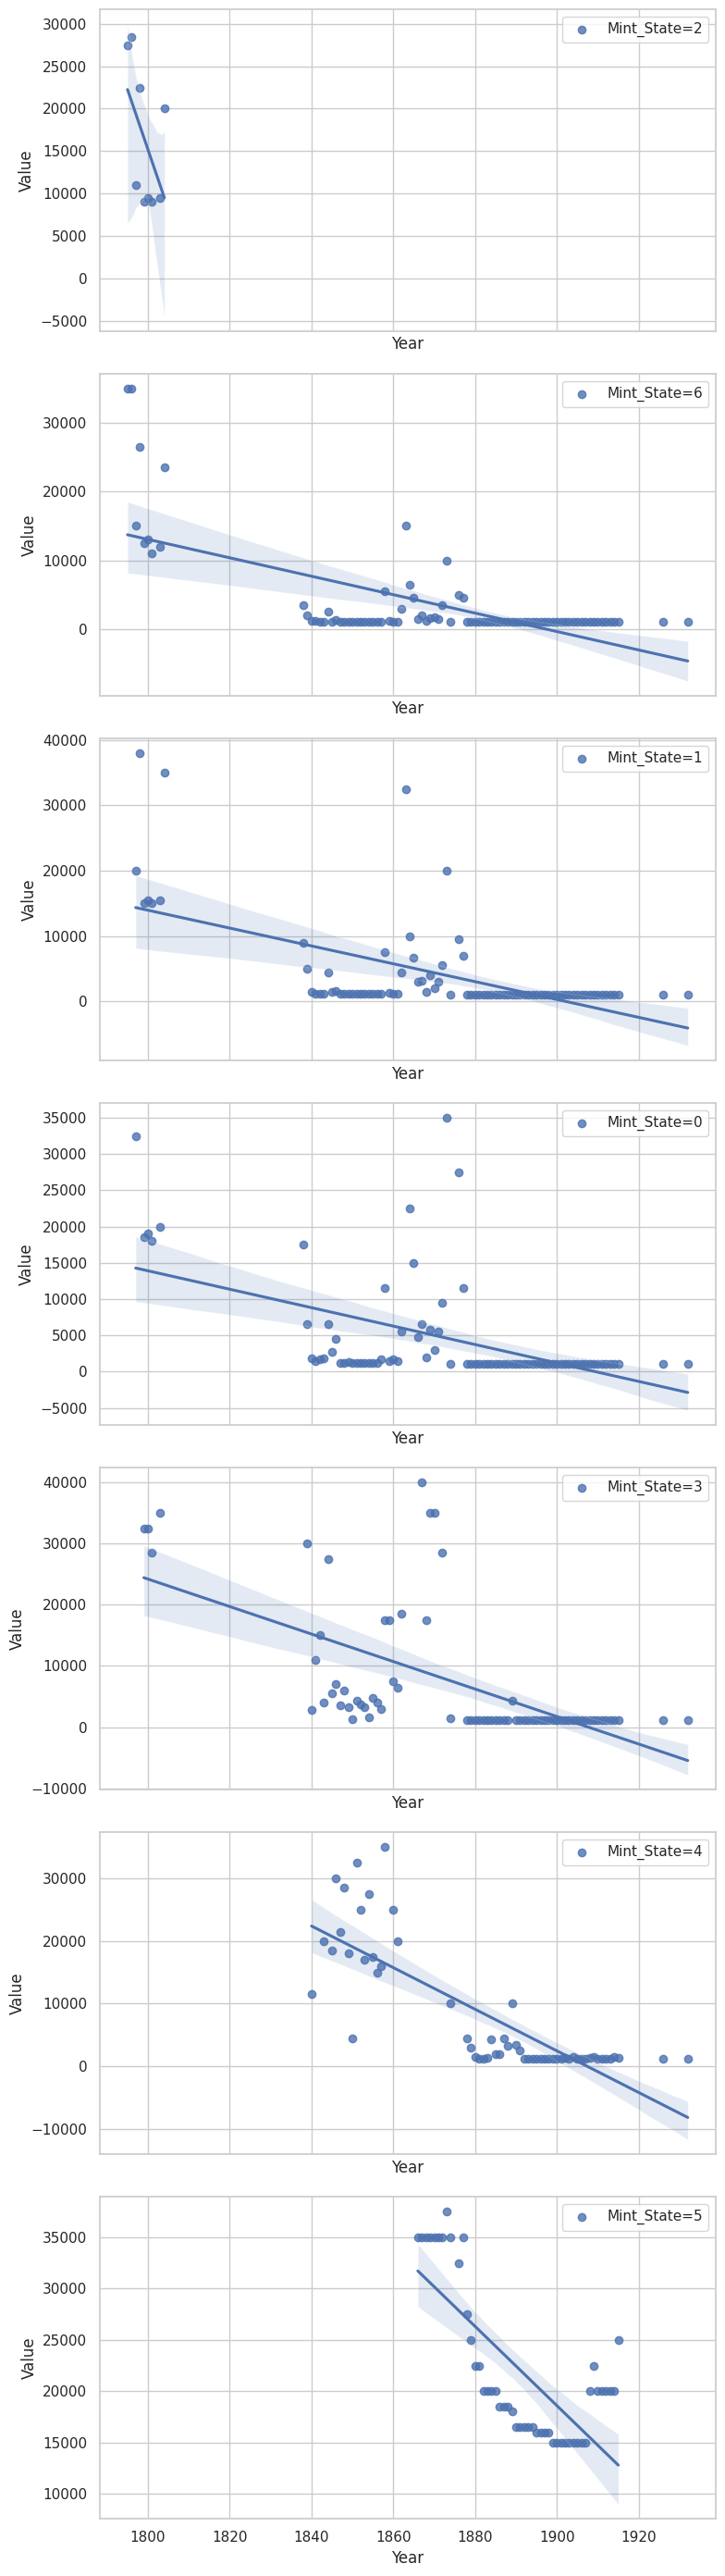

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsEagle[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsEagle[coinsEagle[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.523474  -0.476672
Mint_State       NaN         NaN       NaN        NaN
Value      -0.523474         NaN  1.000000   0.994211
log_Value  -0.476672         NaN  0.994211   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.660213  -0.709056
Mint_State       NaN         NaN       NaN        NaN
Value      -0.660213         NaN  1.000000   0.908062
log_Value  -0.709056         NaN  0.908062   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.583021  -0.651833
Mint_State       NaN         NaN       NaN        NaN
Value      -0.583021         NaN  1.000000   0.900794
log_Value  -0.651833         NaN  0.900794   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.514001  -0.614892
Mint_State       NaN         NaN       NaN        NaN
Value      -0.514001        

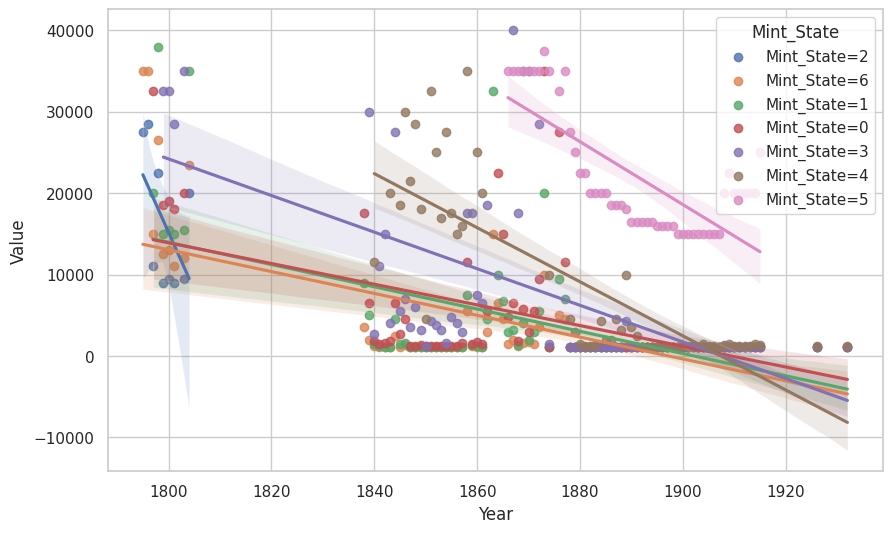

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsEagle[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsEagle[coinsEagle[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [50]:
overall_correlation_matrix = coinsEagle.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.077456,-0.394043,-0.462389
Mint_State,0.077456,1.000000,0.170238,0.165775
Value,-0.394043,0.170238,1.000000,0.930874
log_Value,-0.462389,0.165775,0.930874,1.000000


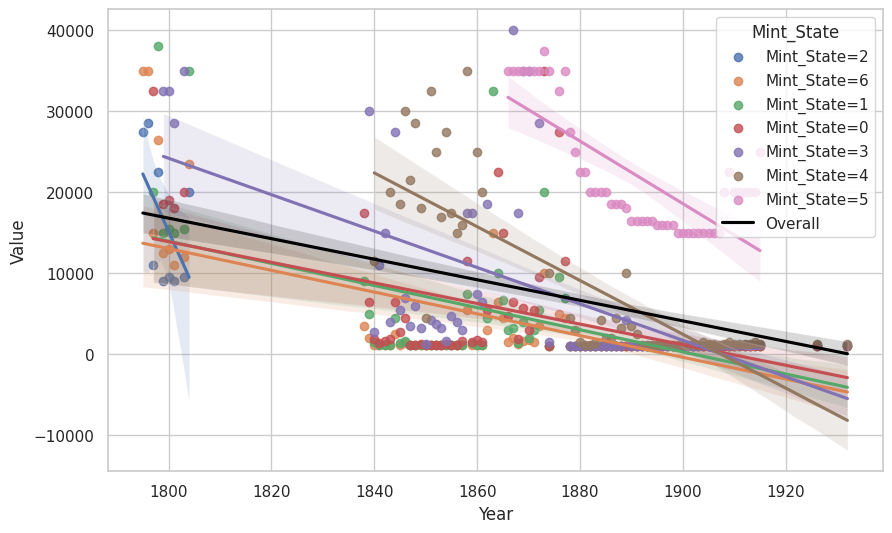

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsEagle[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsEagle[coinsEagle[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsEagle[attribute_column], y=coinsEagle[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

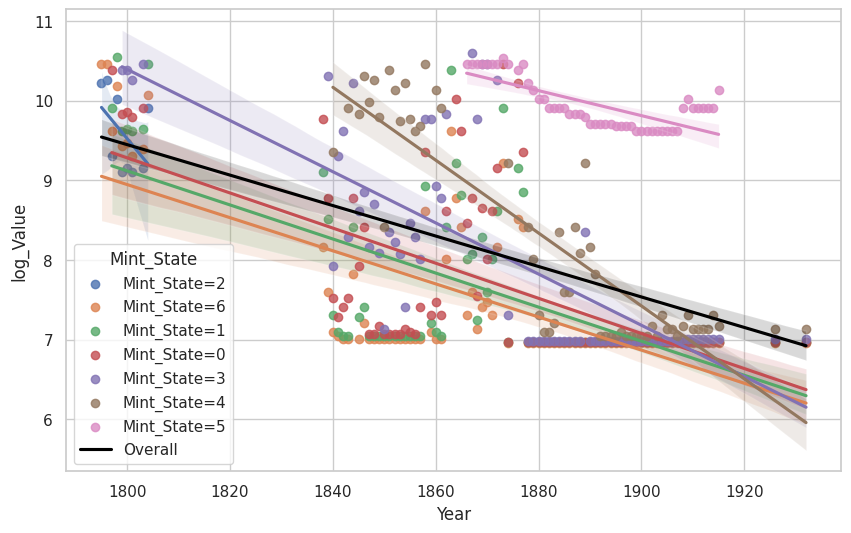

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsEagle[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsEagle[coinsEagle[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsEagle[attribute_column], y=coinsEagle[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()